Given a Bank customer, can we build a classifier that can determine whether they will leave or not using Neural networks?

Description: The data set has 14 variables.
'Exited' variable is the dependent variable. 3 variables - 'RowNumber', 'CustomerId', 'Surname' variables are unique for each record and hence wouldn't add any value for analysis.
'Geography' and 'Gender' variables are categorical in nature and hence they need to be converted for analysis purposes.

In [101]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
import keras
import tensorflow as tf
tf.random.set_seed(22)
from keras import optimizers
tf.__version__

'2.0.0'

1. Read the dataset

In [102]:
# https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling
df = pd.read_csv("churn.csv")

In [103]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [104]:
df.info() # Three Object data type features that have to be converted to numeric.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [105]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


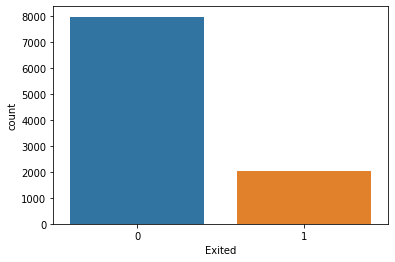

In [106]:
sns.countplot(df['Exited']) # Dataset is imbalanced.

2. Drop the columns which are unique for all users like IDs (2.5 points)

In [107]:
df.drop(columns = ['RowNumber','CustomerId','Surname'], axis = 1, inplace=True)
df.shape

(10000, 11)

In [108]:
# Converting Categorical variable to numeric.
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Geography'] = le.fit_transform(df['Geography'])

3. Distinguish the feature and target set (2.5 points)

In [119]:
x = df.drop(columns = 'Exited', axis = 1)
y = df['Exited']
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10


4. Divide the data set into training and test sets ( 2.5 points)

In [110]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=0, stratify = y)

In [117]:
print('X_train:', x_train.shape)
print('X_test:', x_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

X_train: (8500, 10)
X_test: (1500, 10)
y_train: (8500,)
y_test: (1500,)


5. Normalize the train and test data (5 points)

In [113]:
from sklearn.preprocessing import StandardScaler
x_train_norm = StandardScaler().fit_transform(x_train)
x_test_norm = StandardScaler().fit_transform(x_test)
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

6. Initialize & build the model (10 points)

In [114]:
from keras.models import Sequential
from keras.layers import Dense

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(activation = 'relu', input_dim = 10, units=6))
model.add(tf.keras.layers.Dense(20, activation = 'relu')) 
model.add(tf.keras.layers.Dense(1,activation = 'sigmoid')) 
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

model.fit(x_train_norm, y_train, validation_data=(x_test_norm,y_test),epochs=100,batch_size=30)

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 6)                 66        
_________________________________________________________________
dense_22 (Dense)             (None, 20)                140       
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 21        
Total params: 227
Trainable params: 227
Non-trainable params: 0
_________________________________________________________________
Train on 8500 samples, validate on 1500 samples
Epoch 1/100
8500/8500 [==============================] - 1s 66us/sample - loss: 0.6078 - accuracy: 0.6988 - val_loss: 0.5163 - val_accuracy: 0.7960
Epoch 2/100
8500/8500 [==============================] - 0s 34us/sample - loss: 0.4997 - accuracy: 0.7964 - val_loss: 0.4966 - val_accuracy: 0.7960
Epoch 3/100
8500/8500 [===================

7. Predict the results using 0.5 as a threshold (5 points)

In [115]:
y_pred = model.predict(x_test_norm)
y_pred = (y_pred > 0.5)

8. Print the Accuracy score and confusion matrix (2.5 points)

In [116]:
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print("Confusion Matrix: \n",metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))
print(metrics.classification_report(y_test, y_pred))

Accuracy:  0.848
Confusion Matrix: 
 [[1154   40]
 [ 188  118]]
              precision    recall  f1-score   support

           0       0.86      0.97      0.91      1194
           1       0.75      0.39      0.51       306

    accuracy                           0.85      1500
   macro avg       0.80      0.68      0.71      1500
weighted avg       0.84      0.85      0.83      1500



Due to class imbalance we can see that the precision & recall are lower for class 1 and better for class 0 even though the test accuracy is 85%. The model is better atv  predicting customers who will not exit.